# Lesson 1

## ----------------------------------------------------------------------------------------------------------

## Classifying Different Types of Pumpkin Seeds 🎃🌱

Pumpkin seeds are widely consumed as snacks around the world due to their rich content of proteins, fats, carbohydrates, and minerals. The **"SementesAbobora.xlsx"** dataset contains a study on the two most important and high-quality types of pumpkin seeds, **“Ürgüp Sivrisi”** and **“Çerçevelik”**, which are commonly grown in the Ürgüp and Karacaören regions of Turkey.

Many seed species have visual similarities, making manual classification difficult and prone to errors. Neural networks can be trained to identify patterns that are not easily noticeable to the human eye, improving classification accuracy.

Imagine you have been given the challenge of developing an **intelligence system to identify seed types to assist agricultural engineers**. To balance result accuracy with the complexity of seed characteristics, you have chosen to use **multilayer perceptron neural networks**. Let's get to the application!

### Features

- Perimeter
- Major_Axis_Length
- Minor_Axis_Length
- Convex_Area
- Equivalent_Diameter
- Eccentricity
- Solidity
- Extent
- Roundness
- Ratio
- Compactness

### Target
Classes:  
((A) Çerçevelik, (B) Ürgüp Sivrisi)


In [83]:
import pandas as pd

In [84]:
df_seed = pd.read_excel('SementesAbobora.xlsx') # Pumpkin Seeds.xlsx
df_seed.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [85]:
df_seed.shape

(2500, 13)

In [86]:
from sklearn.utils import shuffle

df_seed = shuffle(df_seed) # Shuffling the DataFrame

In [87]:
df_seed.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
1382,77194,1228.611,544.9214,181.5364,77899,313.5067,0.9429,0.9909,0.7768,0.6426,3.0017,0.5753,(B) Ürgüp Sivrisi
1974,81267,1151.429,472.8079,220.0933,82368,321.6712,0.8850,0.9866,0.6503,0.7703,2.1482,0.6803,(B) Ürgüp Sivrisi
2189,68778,1025.168,408.2745,215.9211,69437,295.9238,0.8487,0.9905,0.6374,0.8224,1.8909,0.7248,(B) Ürgüp Sivrisi
2158,93398,1241.998,509.9614,234.5406,94916,344.8449,0.8880,0.9840,0.7422,0.7609,2.1743,0.6762,(B) Ürgüp Sivrisi
1332,67404,1037.238,430.8914,199.7996,67930,292.9530,0.8860,0.9923,0.7446,0.7873,2.1566,0.6799,(B) Ürgüp Sivrisi


In [88]:
df_seed['Class'].value_counts() # counting distinct values in class columns

,count
Class,
(A) Çerçevelik,1300
(B) Ürgüp Sivrisi,1200


## Data balance it's working well. Don't need to apply a solution.

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

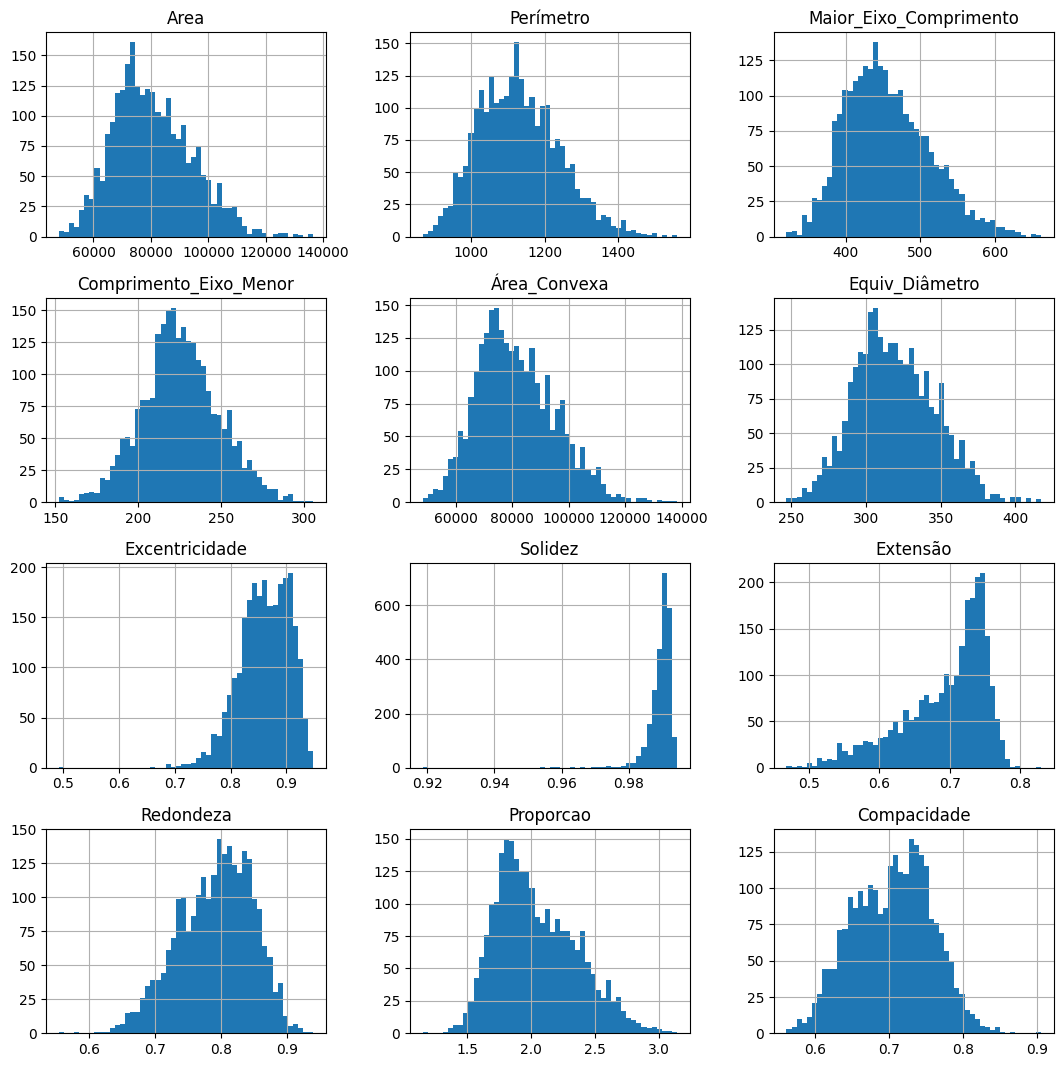

In [90]:
df_seed.hist(bins= 50, figsize=(13,13))
plt.show()

<Axes: >

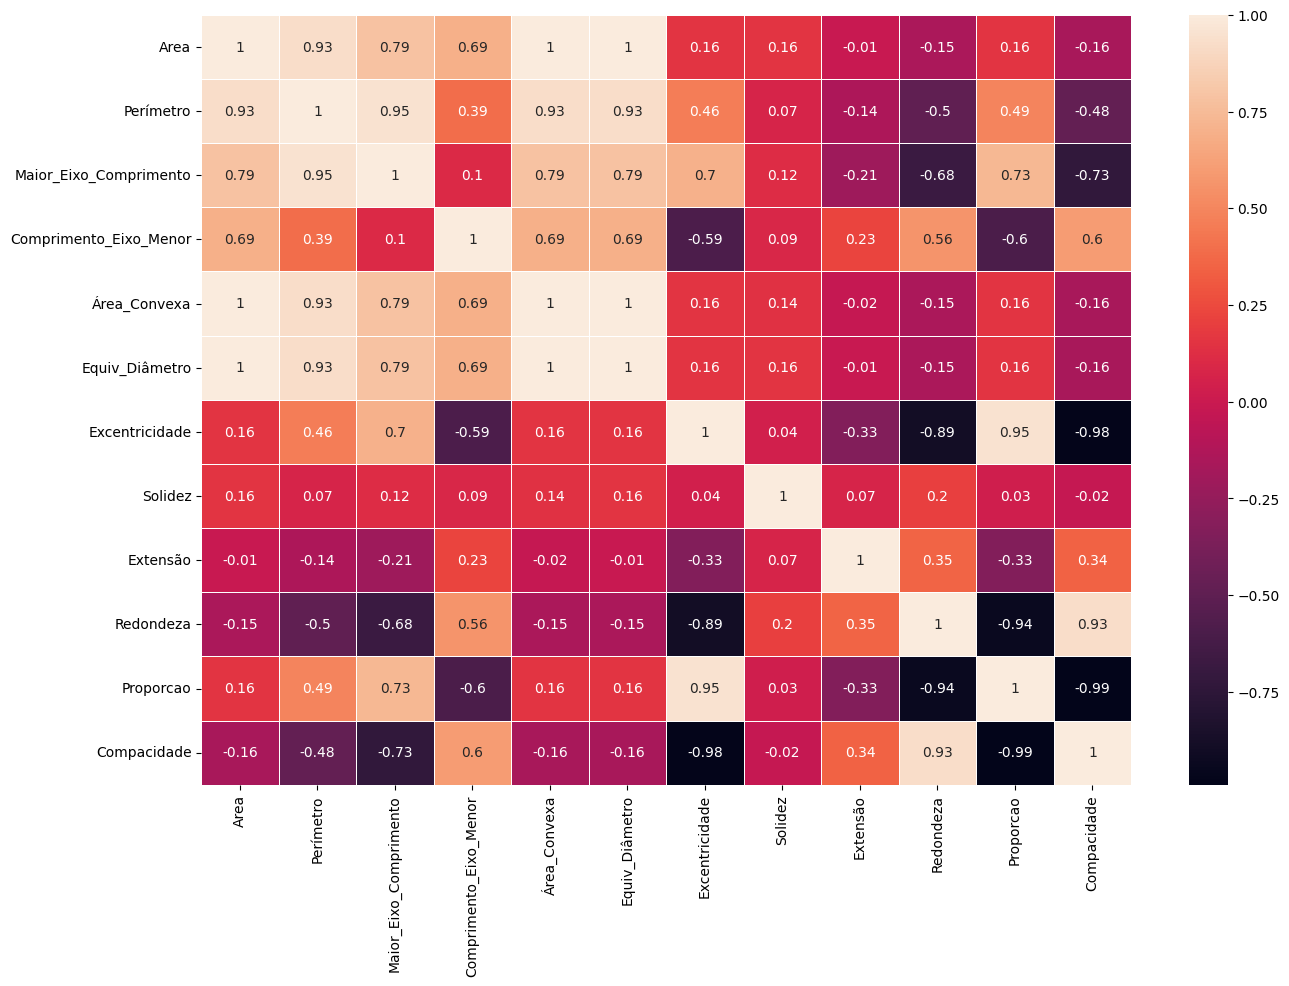

In [91]:
correlation = df_seed.drop(columns=['Class']).corr().round(2)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation, annot=True, linewidths=.5, ax=ax)

In [92]:
df_seed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1382 to 581
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   int64  
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   int64  
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 273.4+ KB


### Column Class it's an object, convert to binary to work with ML

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_seed['Class'] = le.fit_transform(df_seed['Class'])

In [94]:
set(df_seed['Class']) #Checking if convert works

{0, 1}

In [95]:
#selecting only necessary columns
X = df_seed[['Area','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df_seed['Class']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instance StandardScaler
scaler.fit(X_train)        # Computes the mean and standard deviation of the training set
#scaler.fit(X_test)        # Not recomended do this with test

StandardScaler()

## The fit() should be applied only to the training set (X_train) because the test data needs to be transformed using the statistics from the training set.

In [98]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
X_train

array([[ 1.31854538,  0.40637628,  2.72679332, ...,  1.9317991 ,
        -1.70533379,  2.08950965],
       [ 2.71459664,  2.5706281 ,  1.13277117, ..., -0.86165713,
         1.01954999, -1.02814076],
       [-0.25357055,  0.19273493, -0.77011648, ..., -1.07390944,
         0.80107661, -0.88247384],
       ...,
       [-0.40396981, -0.86028643,  0.8951371 , ...,  1.57564692,
        -1.46685486,  1.70169513],
       [ 0.67529705,  1.3498335 , -0.61691311, ..., -1.78801255,
         1.76737674, -1.67134533],
       [-0.7582257 , -0.75676892, -0.48191668, ...,  0.23917687,
        -0.27604794,  0.17503015]])

In [100]:
X_train.shape #Viewing volum

(2000, 9)

In [101]:
X_test.shape #Viewing volum

(500, 9)

### Making 9 columns become 1 column to build a matrix

In [106]:
import numpy as np
# Conveting type from pandas.core.serie to numpy.ndarray
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [107]:
type(y_train)

numpy.ndarray

In [109]:
y_train.shape

(2000, 1)

# Multilayer neural network architecture

#### Using Tensorflow and Keras to develop a friendly interface.

In [111]:
import tensorflow as tf

# Keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [122]:
tf.random.set_seed(7) # Setting seed

# Defining network inputs + batch processing size
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]   # Predict Class
batch_size = 20

# Abrindo uma sequencia de neuronios
model = models.Sequential()

# input layer
model.add(layers.Dense(
                        batch_size
                       ,input_shape=(input_shape,)
                       ,activation='relu'))

# hidden layer
model.add(layers.Dense(
                        12
                       ,activation='relu'))

# hidden layer
model.add(layers.Dense(
                        6
                       ,activation='relu'))


# dropout layer
model.add(layers.Dropout(0.5))

# output layer
# Camada de saída
model.add(layers.Dense(
                        output_shape
                       ,activation='sigmoid'))

# Setting Adam optimizer in a specific learning rate
# Set learning rate
# learning_rate = 0.001
optimizer = Adam(0.001)

# Compiling model - "binary_crossentropy" because class become binary, before of this cell.
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summmary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 20)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
#Setting epoch process
epoch = 100

hist = model.fit(X_train
                 ,y_train
                 ,epoch = epoch
                 ,batch_size=batch_size
                 ,validation_data=(X_test, y_test)
                 ,verbose=0
                 ,callbacks=[TqdmCallback(verbose=0)])

0epoch [00:00, ?epoch/s]

In [117]:
acc = '{:.2f}'.format(hist.history['accuracy'][-1]*100)
val_acc = '{:.2f}'.format(hist.history['val_accuracy'][-1]*100)
print(f'Accuracy: {acc}%\nValidation Accuracy: {val_acc}%\nEpoch: {epoch}')

Accuracy: 84.55%
Validation Accuracy: 89.40%
Epoch: 100


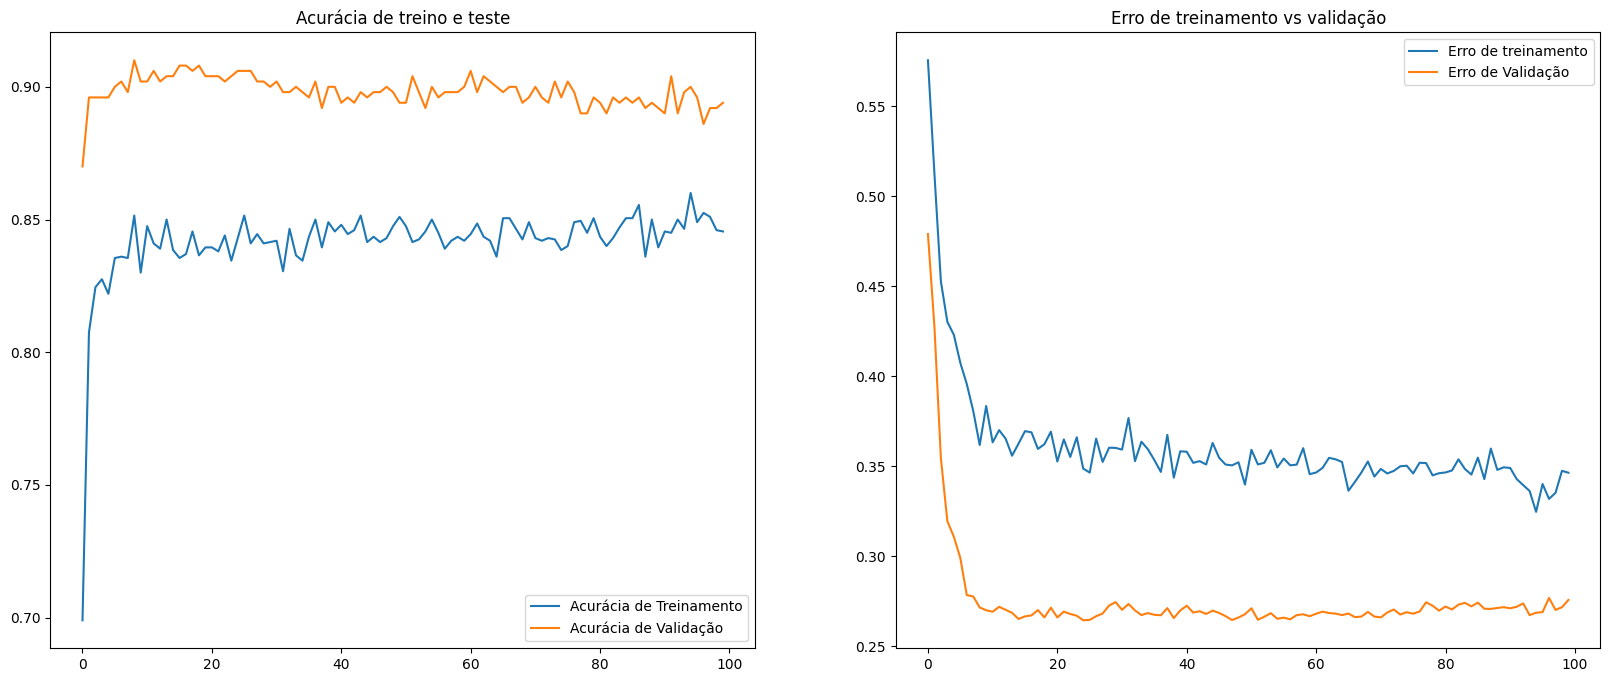

In [118]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [119]:
from sklearn.metrics import classification_report
# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.86      0.93      0.90       244
  (A) Çerçevelik        0.93      0.86      0.89       256

         accuracy                           0.89       500
        macro avg       0.90      0.89      0.89       500
     weighted avg       0.90      0.89      0.89       500

